In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


make sure to rename the columns by removing é


# Exploratory Data Analysis (EDA) for Packages and Receptacle Datasets

In [2]:
# Load datasets
packages_df = pd.read_csv('../data/raw/packages_data_2023_2025.csv',delimiter=';')
receptacle_df = pd.read_csv('../data/raw/receptacle_data_2023_2025.csv',delimiter=';')

In [3]:
# Rename for consistency
receptacle_df.rename(columns={
    'EVENT_TYPECD': 'EVENT_TYPE_CD',
    'nextetablissement_postal': 'next_etablissement_postal'
}, inplace=True)

In [4]:
packages_df.shape, receptacle_df.shape

((1000000, 6), (1000000, 5))

In [5]:
#convert dates to dateTime for compatibility
packages_df['date'] = pd.to_datetime(packages_df['date'])
receptacle_df['date'] = pd.to_datetime(receptacle_df['date'])

In [6]:
packages_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   RECPTCL_FID                1000000 non-null  object        
 1   MAILITM_FID                1000000 non-null  object        
 2   date                       1000000 non-null  datetime64[ns]
 3   etablissement_postal       973228 non-null   object        
 4   EVENT_TYPE_CD              1000000 non-null  int64         
 5   next_etablissement_postal  411733 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 45.8+ MB


In [7]:
receptacle_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   RECPTCL_FID                1000000 non-null  object        
 1   date                       1000000 non-null  datetime64[ns]
 2   etablissement_postal       998889 non-null   object        
 3   EVENT_TYPE_CD              1000000 non-null  int64         
 4   next_etablissement_postal  576148 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 38.1+ MB


In [8]:
packages_df.head(n=5)

,RECPTCL_FID,MAILITM_FID,date,etablissement_postal,EVENT_TYPE_CD,next_etablissement_postal
0,USORDADZALGDAUN30050001900005,0000420016941,2023-07-04 05:00:00,NaN,12,ETAB_2389
1,USORDADZALGDAUN30050001900005,0000689914049,2023-07-04 05:00:00,NaN,12,ETAB_2389
2,USORDADZALGDAUN30050001900005,0000700051000,2023-07-04 05:00:00,NaN,12,ETAB_2389
3,USORDADZALGDAUN30102003900026,0031069949200,2023-12-04 05:00:00,NaN,12,ETAB_2389
4,FRCDGADZALGDAUN40553006010061,1A02349441537,2024-12-19 11:05:00,NaN,12,ETAB_2389


In [9]:
receptacle_df.head(n=5)

,RECPTCL_FID,date,etablissement_postal,EVENT_TYPE_CD,next_etablissement_postal
0,AEDXBADZAAEDACN45001001100219,2024-07-24 22:40:00.000,ETAB_0001,107,ETAB_0030
1,AEDXBADZAAEDACN45001001100219,2024-07-26 16:18:34.623,ETAB_0002,130,NaN
2,AEDXBADZAAEDACN45001001100219,2024-07-26 16:23:22.207,ETAB_0002,132,ETAB_0003
3,AEDXBADZAAEDACN45001001100219,2024-07-28 13:04:36.387,ETAB_0003,132,ETAB_0033
4,AEDXBADZAAEDACN45002001100075,2024-07-27 22:40:00.000,ETAB_0001,107,ETAB_0030


 Initial Observations
- both datasets cover the period from 2023 to 2025
- we have no target variable in either dataset
- for packages dataset:
    - 6 features in total with 5 categorical and 1 numerical
    - MAILITM_FID is unique identifier for each package
    - RECPTCL_FID is foreign key linking to receptacle dataset
    - etablissement_postal and next_etablissement_postal have some null values
- for receptacle dataset:
    - 5 features in total with 4 categorical and 1 numerical
    - RECPTCL_FID is unique identifier for each receptacle
    - EVENT_TYPE_CD has some null values

In [10]:
for column in packages_df.columns:
    print(f'{column} has {packages_df[column].nunique()} unique values.')
    print(f'{column} has {packages_df[column].isnull().sum()} null values.')
    print("\n")


RECPTCL_FID has 45306 unique values.
RECPTCL_FID has 0 null values.


MAILITM_FID has 212731 unique values.
MAILITM_FID has 0 null values.


date has 849213 unique values.
date has 0 null values.


etablissement_postal has 2825 unique values.
etablissement_postal has 26772 null values.


EVENT_TYPE_CD has 24 unique values.
EVENT_TYPE_CD has 0 null values.


next_etablissement_postal has 2716 unique values.
next_etablissement_postal has 588267 null values.




In [11]:
for column in receptacle_df.columns:
    print(f'{column} has {receptacle_df[column].nunique()} unique values.')
    print(f'{column} has {receptacle_df[column].isnull().sum()} null values.')
    print("\n")

RECPTCL_FID has 215867 unique values.
RECPTCL_FID has 0 null values.


date has 694907 unique values.
date has 0 null values.


etablissement_postal has 50 unique values.
etablissement_postal has 1111 null values.


EVENT_TYPE_CD has 17 unique values.
EVENT_TYPE_CD has 0 null values.


next_etablissement_postal has 9 unique values.
next_etablissement_postal has 423852 null values.




we notice the following:<br>
- receptacle dataset has more unique values for RECPTCL_FID than packages dataset, indicating one-to-many relationship<br>
- MAILITM_FID is unique in packages dataset.<br>
- packages dataset have more unique date values than receptacle dataset.<br>
- both datasets have null values in etablissement_postal and next_etablissement_postal columns. This requires processing later on<br>
- packages dataset has more unique values in the next_etablissement_postal column compared to receptacle dataset but also more null values. **further investigation is needed to understand why**<br>


In [12]:
packages_df.describe()

,date,EVENT_TYPE_CD
count,1000000,1000000.000000
mean,2024-04-09 07:24:35.733279488,27.271583
min,2020-02-01 09:22:30.150000,1.000000
25%,2023-08-30 09:47:12.600000,30.000000
50%,2024-04-30 07:12:00.241500160,32.000000
75%,2024-11-23 07:37:32.470500096,36.000000
max,2025-03-20 22:45:00,73.000000
std,NaN,12.326209


In [13]:
receptacle_df.describe()

,date,EVENT_TYPE_CD
count,1000000,1000000.000000
mean,2024-01-09 12:36:06.106905088,130.512065
min,2022-12-15 02:59:00,100.000000
25%,2023-05-31 09:15:37.029250048,107.000000
50%,2023-12-27 21:48:30,131.000000
75%,2024-08-05 11:27:24.005250048,132.000000
max,2025-03-21 15:15:00,178.000000
std,NaN,22.059407


for EVENT_TYPE_CD we notice different range of values for packages and receptacle datasets indicating different types of events.<br>

#### Visualizations
for now we will visualize the distribution of EVENT_TYPE_CD in both datasets.<br>



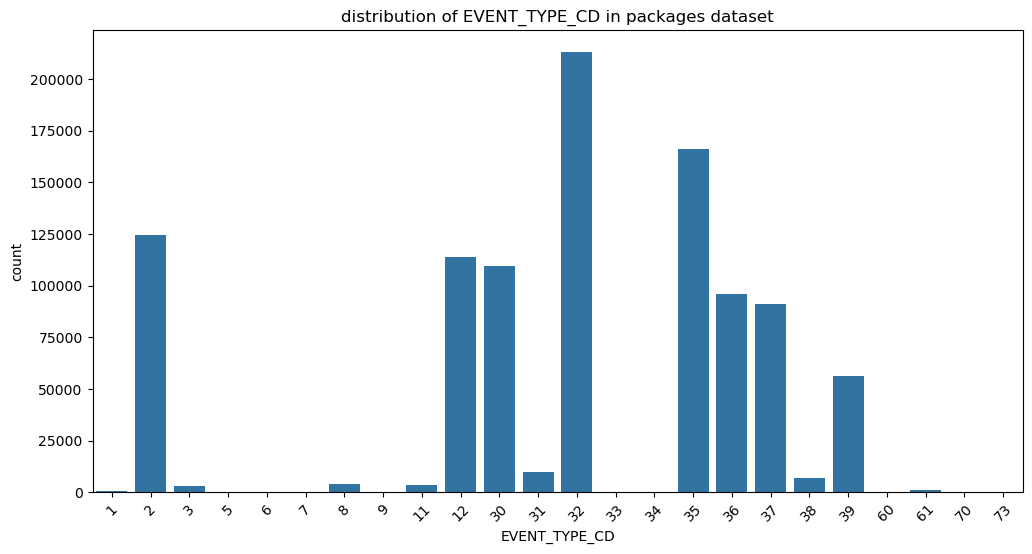

In [14]:
# Distribution of EVENT_TYPE_CD in packages dataset
plt.figure(figsize=(12, 6))
sns.countplot(data=packages_df,x='EVENT_TYPE_CD')
plt.title('distribution of EVENT_TYPE_CD in packages dataset')
plt.xlabel('EVENT_TYPE_CD')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

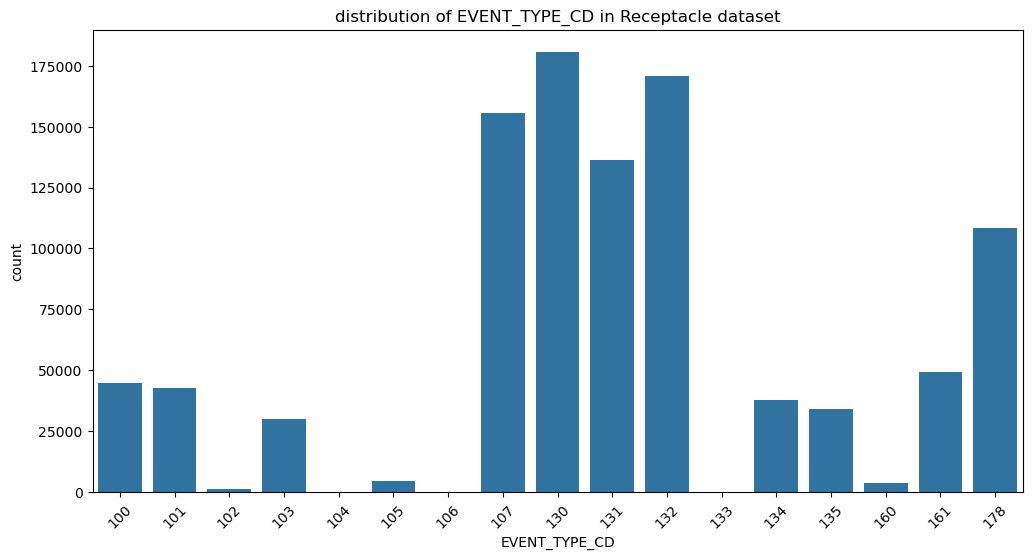

In [15]:
# Distribution of EVENT_TYPE_CD in receptacle dataset
plt.figure(figsize=(12, 6))
sns.countplot(data=receptacle_df,x='EVENT_TYPE_CD')
plt.title('distribution of EVENT_TYPE_CD in Receptacle dataset')
plt.xlabel('EVENT_TYPE_CD')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

for etablissement_postal and next_etablissement_postal I will start with visualizing the receptacle dataset since the packages dataset has a lot of unique values<br>

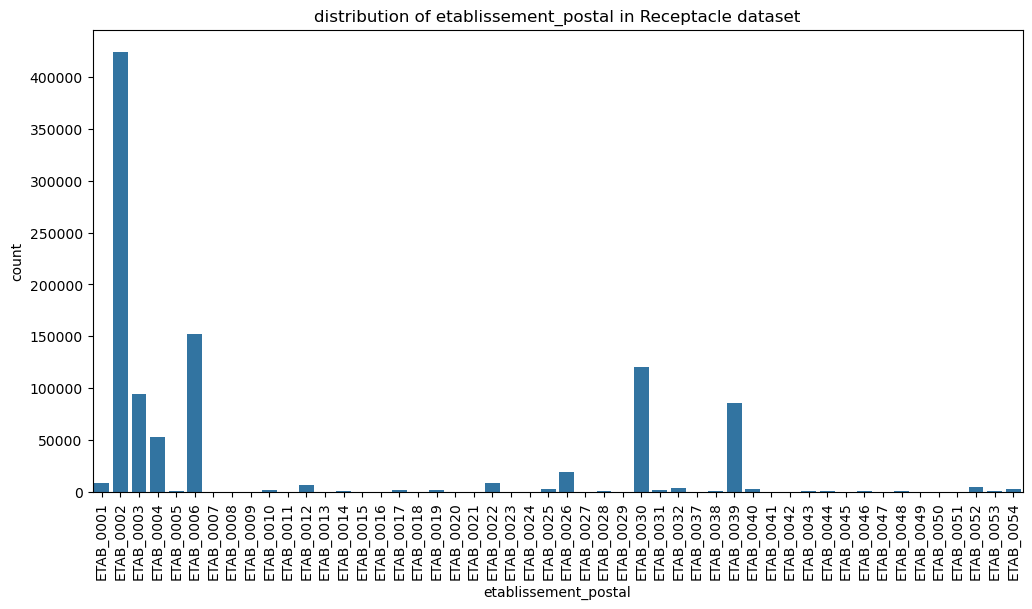

In [16]:
# Distribution of etablissement_postal in receptacle dataset
plt.figure(figsize=(12, 6))
sns.countplot(data=receptacle_df,x='etablissement_postal')
plt.title('distribution of etablissement_postal in Receptacle dataset')
plt.xlabel('etablissement_postal')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()


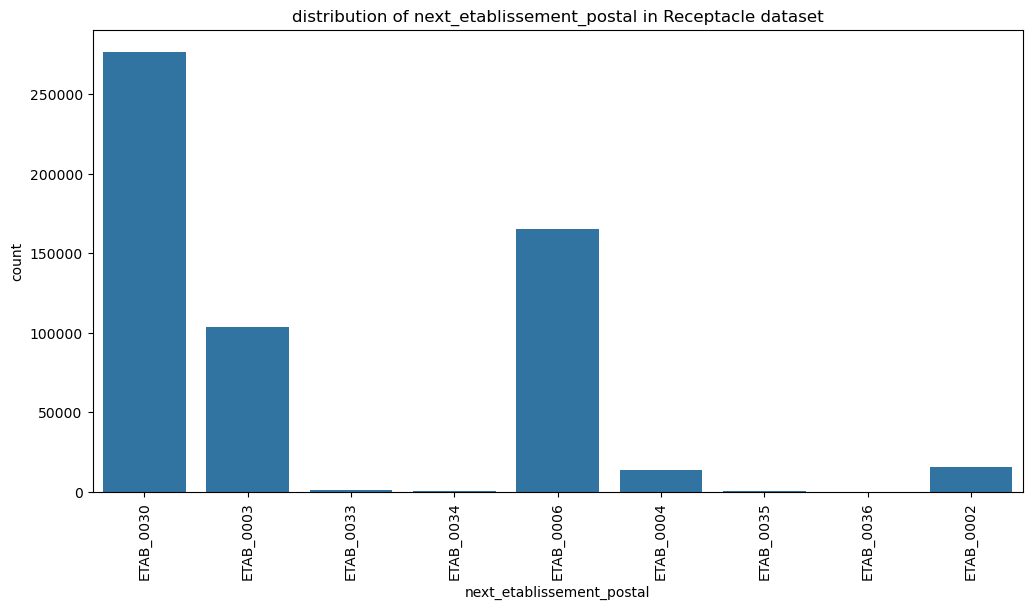

In [17]:
# Distribution of next_etablissement_postal in receptacle dataset
plt.figure(figsize=(12, 6))
sns.countplot(data=receptacle_df,x='next_etablissement_postal')
plt.title('distribution of next_etablissement_postal in Receptacle dataset')
plt.xlabel('next_etablissement_postal')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

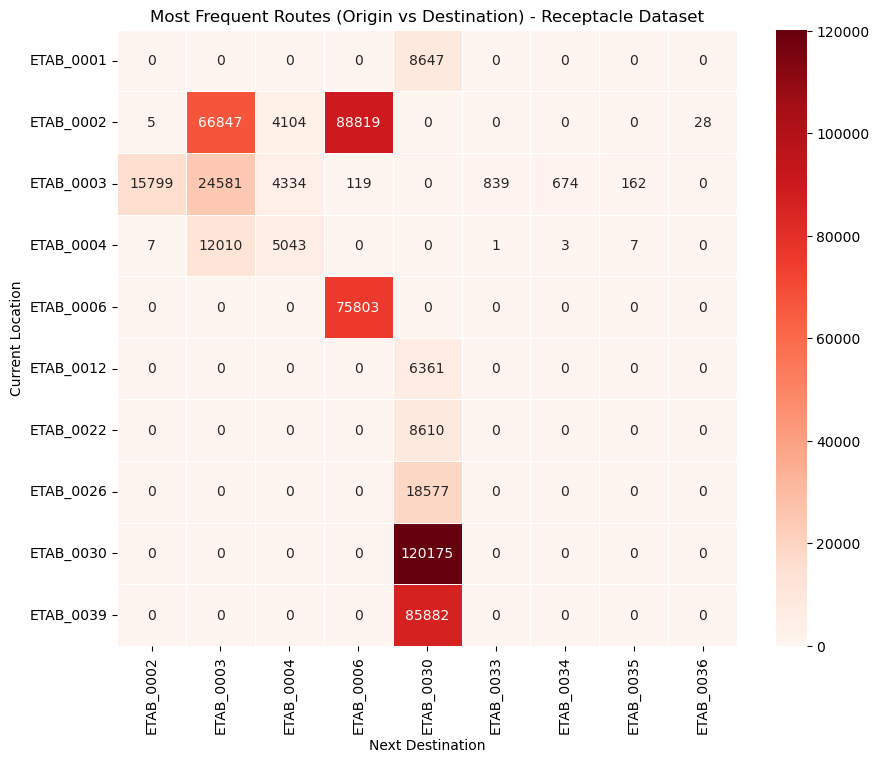

In [18]:
# 1.  Top 10 locations to keep the map small
top_locs = receptacle_df['etablissement_postal'].value_counts().head(10).index
top_next = receptacle_df['next_etablissement_postal'].value_counts().head(10).index

# 2. include only these top locations
filtered_df = receptacle_df[
    (receptacle_df['etablissement_postal'].isin(top_locs)) &
    (receptacle_df['next_etablissement_postal'].isin(top_next))
]

# 3. Create a Matrix (Cross-tabulation)
matrix = pd.crosstab(filtered_df['etablissement_postal'], filtered_df['next_etablissement_postal'])

# 4. Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, cmap='Reds', annot=True, fmt='d', linewidths=.5)
plt.title("Most Frequent Routes (Origin vs Destination) - Receptacle Dataset")
plt.xlabel("Next Destination")
plt.ylabel("Current Location")
plt.show()

we notice that some etablissements have significantly higher traffic compared to others, indicating  major distribution centers.<br>

for etablissement_postal and next_etablissement_postal we will create a heatmap to visualize the flow between current location and next destination.<br>
Count of parcels moving from A to B to see the density of connections between them

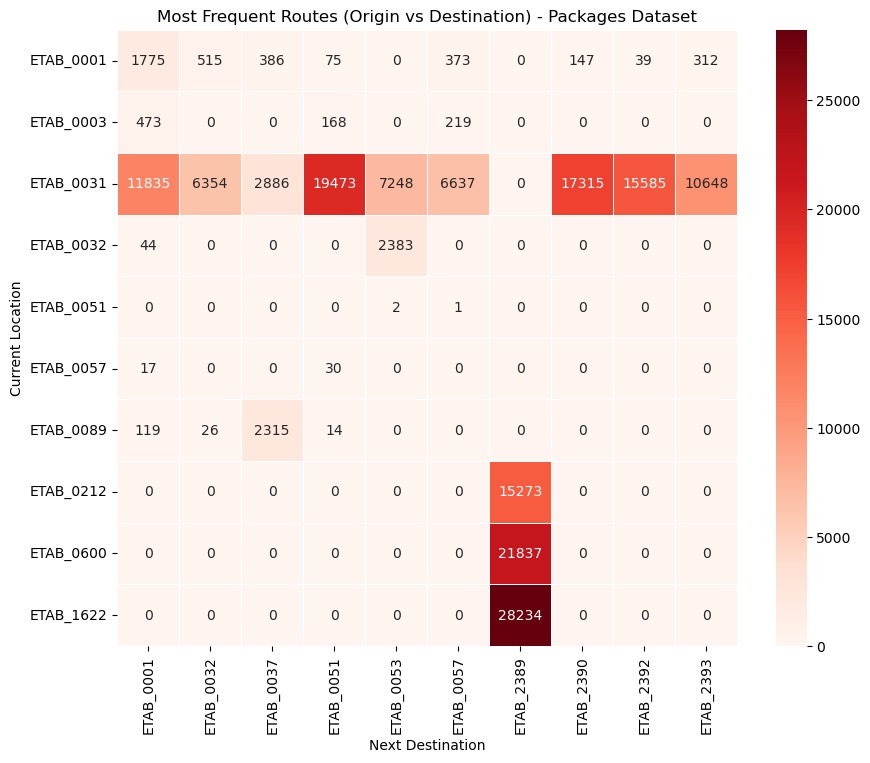

In [19]:
# 1.  Top 10 locations to keep the map small
top_locs = packages_df['etablissement_postal'].value_counts().head(10).index
top_next = packages_df['next_etablissement_postal'].value_counts().head(10).index

# 2. include only these top locations
filtered_df = packages_df[
    (packages_df['etablissement_postal'].isin(top_locs)) &
    (packages_df['next_etablissement_postal'].isin(top_next))
]

# 3. Create a Matrix (Cross-tabulation)
matrix = pd.crosstab(filtered_df['etablissement_postal'], filtered_df['next_etablissement_postal'])

# 4. Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, cmap='Reds', annot=True, fmt='d', linewidths=.5)
plt.title("Most Frequent Routes (Origin vs Destination) - Packages Dataset")
plt.xlabel("Next Destination")
plt.ylabel("Current Location")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9156\2799116581.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Volume', y='Location', data=location_counts.head(20), palette='viridis')


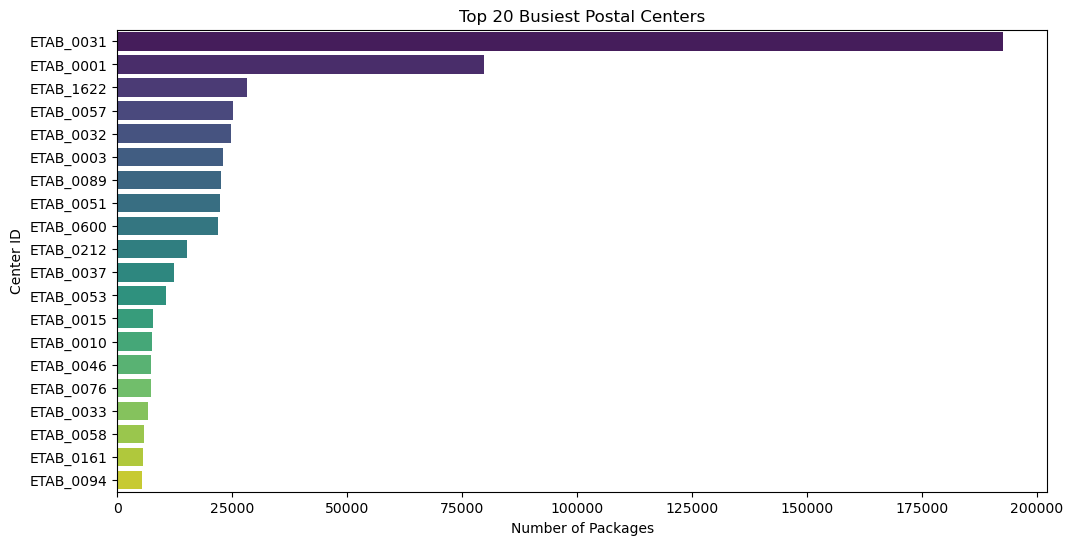

In [20]:
# Count packages per location
location_counts = packages_df['etablissement_postal'].value_counts().reset_index()
location_counts.columns = ['Location', 'Volume']

# keep only top 20 busiest centers
plt.figure(figsize=(12, 6))
sns.barplot(x='Volume', y='Location', data=location_counts.head(20), palette='viridis')
plt.title("Top 20 Busiest Postal Centers")
plt.xlabel("Number of Packages")
plt.ylabel("Center ID")
plt.show()

we notice the same pattern as before with some etablissements having significantly higher traffic compared to others.<br>

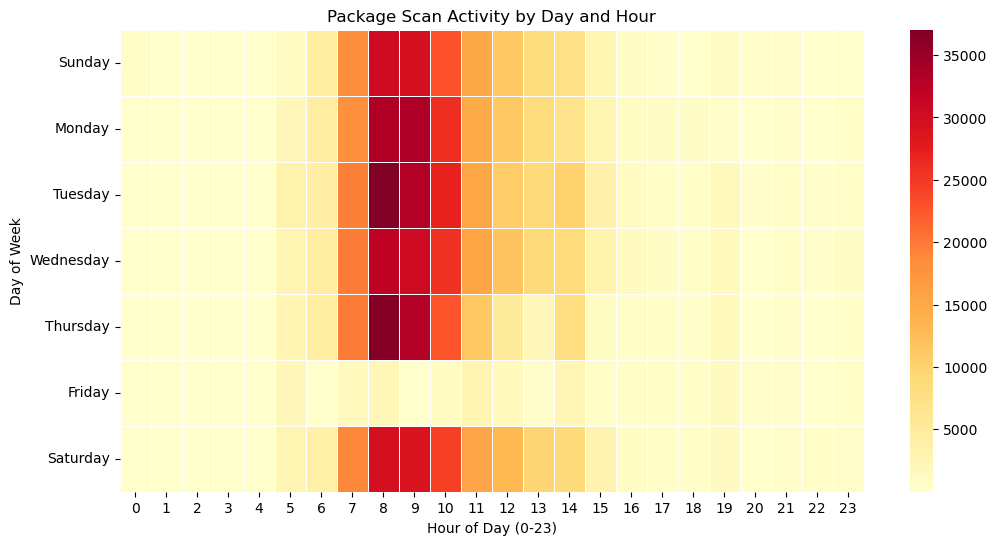

In [21]:

# 1. Extract Time Features
packages_df['hour'] = packages_df['date'].dt.hour
packages_df['day_of_week'] = packages_df['date'].dt.day_name()

# 2. Create a Pivot Table (Cross-tabulation)
# Rows = Day, Cols = Hour, Values = Count of Scans
heatmap_data = pd.crosstab(
    packages_df['day_of_week'],
    packages_df['hour']
)

days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
heatmap_data = heatmap_data.reindex(days_order)

# 3. Plot
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=.5, annot=False)
plt.title("Package Scan Activity by Day and Hour")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Day of Week")
plt.show()

we notice that the busiest times for package scans are during weekdays, particularly from mid-morning to late afternoon.<br>

In [22]:
# Merge datasets on RECPTCL_FID to analyze relationship
merged_df = pd.merge(
    packages_df,
    receptacle_df,
    on='RECPTCL_FID',
    how='left',
    suffixes=('_package', '_receptacle')
)

In [23]:
merged_df.head(n=20)

,RECPTCL_FID,MAILITM_FID,date_package,etablissement_postal_package,EVENT_TYPE_CD_package,next_etablissement_postal_package,hour,day_of_week,date_receptacle,etablissement_postal_receptacle,EVENT_TYPE_CD_receptacle,next_etablissement_postal_receptacle
0,USORDADZALGDAUN30050001900005,0000420016941,2023-07-04 05:00:00,NaN,12,ETAB_2389,5,Tuesday,NaT,NaN,NaN,NaN
1,USORDADZALGDAUN30050001900005,0000689914049,2023-07-04 05:00:00,NaN,12,ETAB_2389,5,Tuesday,NaT,NaN,NaN,NaN
2,USORDADZALGDAUN30050001900005,0000700051000,2023-07-04 05:00:00,NaN,12,ETAB_2389,5,Tuesday,NaT,NaN,NaN,NaN
3,USORDADZALGDAUN30102003900026,0031069949200,2023-12-04 05:00:00,NaN,12,ETAB_2389,5,Monday,NaT,NaN,NaN,NaN
4,FRCDGADZALGDAUN40553006010061,1A02349441537,2024-12-19 11:05:00,NaN,12,ETAB_2389,11,Thursday,2024-12-19 11:05:00.000,ETAB_0039,107.0,ETAB_0030
5,FRCDGADZALGDAUN40553006010061,1A02349441537,2024-12-19 11:05:00,NaN,12,ETAB_2389,11,Thursday,2024-12-21 13:00:29.973,ETAB_0002,130.0,NaN
6,FRCDGADZALGDAUN40553006010061,1A02349441537,2024-12-19 11:05:00,NaN,12,ETAB_2389,11,Thursday,2024-12-21 13:02:00.397,ETAB_0002,132.0,ETAB_0003
7,FRCDGADZALGDAUN40553006010061,1A02349441537,2024-12-19 11:05:00,NaN,12,ETAB_2389,11,Thursday,2024-12-22 07:48:30.920,ETAB_0003,132.0,ETAB_0004
8,FRCDGADZALGDAUN40553006010061,1A02349441537,2024-12-19 11:05:00,NaN,12,ETAB_2389,11,Thursday,2024-12-24 08:47:46.363,ETAB_0004,131.0,ETAB_0004
9,FRCDGADZALGDAUN32487005010095,1A09158628029,2023-12-01 07:45:00,NaN,12,ETAB_2389,7,Friday,2023-12-01 07:45:00.000,ETAB_0039,107.0,ETAB_0030


In [24]:
#number of packages per receptacle
packages_per_receptacle = packages_df.groupby('RECPTCL_FID')['MAILITM_FID'].nunique()
packages_per_receptacle.head()


RECPTCL_FID
AEDXBADZAAEDACN45001001100219    40
AEDXBADZAAEDACN45002001100075    18
AEDXBADZAAEDACN45003001100123    30
AEDXBADZAAEDACN45004001100073    10
AEDXBADZAAEDACN45005001100107    18
Name: MAILITM_FID, dtype: int64

# Feature Extraction 

### stripe white spaces from IDs

In [25]:

packages_df['RECPTCL_FID'] = packages_df['RECPTCL_FID'].str.strip()
packages_df['MAILITM_FID'] = packages_df['MAILITM_FID'].str.strip()
receptacle_df['RECPTCL_FID'] = receptacle_df['RECPTCL_FID'].str.strip()

### Check RECPTCL_FID and MAILITM_FID having same length formats
if yes then we can split them into meaningfull parts

In [26]:
same=1
print("\n=== RECPTCL_FID  ===")
print(f"testing if the lengths of RECPTCL_FID values are all the same:")
for val in packages_df['RECPTCL_FID'].values:
    if len(str(val)) != 29 :
        print(f"  {val} (length: {len(str(val))})")
        same=0
        break
if same==1:
    print('all same length' )

print("\n=== MAILITM_FID  ===")
print(f"testing if the lengths of MAILITM_FID values are all the same:")
for val in packages_df['MAILITM_FID'].values:
    if len(str(val)) != 13 :
        print(f"  {val} (length: {len(str(val))})")
        same=0
        break
if same==1:
    print ('all same length' )




=== RECPTCL_FID  ===
testing if the lengths of RECPTCL_FID values are all the same:
all same length

=== MAILITM_FID  ===
testing if the lengths of MAILITM_FID values are all the same:
all same length


### RECPTCL_FID Analysis
- **Format:** 29-character string (e.g., `USORDADZALGDAUN30050001900005`)
- **Data Quality:** No null values (1,000,000) | 215,867 unique values in receptacle dataset and 45306 unique values in packages dataset
- **Extractable Features:**
  - Origin Country (2 chars): US, FR, AE, etc.
  - Origin Hub (mostly the airport) (3 chars): ORD, CDG, DXB, etc.
  - Export Bag (1 char)(describes the type of the physical bag or container): A, B, C...
  - Destination Country (2 chars): DZ, AI, AA, etc.
  - Arrival Hub (3 chars): ALG, ADC, etc.
  - Inbound Unit (3 chars): DAU, DAC, etc.(DAU for Douane)
  - treatment Class (1 char)(describes How is this package supposed to be treated?): N, A, etc.
  - ID Number (14 digits, integer): 30050001900005, etc.

### MAILITM_FID Analysis
- **Format:** 13-character string according to the S10-12 patern (e.g., `CA000132868US`, `CA000340856PK`)
- **Data Quality:** No null values (1,000,000 packages)
- **Extractable Features:**
  - Service Indicator (2 chars): CA, etc.
  - Serial Number (8 chars): 00013286, 00034085, etc.
  - Check Digit (1 char): 8, 6, etc.
  - Country Code (3 chars, right-stripped): US, PK.


## Definition of the parser funtions
These functions are responsible for spliting the IDs into parts

In [45]:
def parse_recptcl_fid(id_str):
    origin_country = id_str[0:2]
    origin_hub = id_str[2:5]
    export_bag = id_str[5]
    destination_country = id_str[6:8]
    arrival_hub = id_str[8:11]
    inbound_unit = id_str[11:14]
    treatment_class = id_str[14]
    id_number = id_str[15:]
    return origin_country, origin_hub, export_bag, destination_country, arrival_hub, inbound_unit, treatment_class, id_number

def parse_mailitm_fid(id_str):
    service_indicator = id_str[0:2]
    serial_number = id_str[2:10]
    check_digit = id_str[10]
    country_code = id_str[11:14].strip()
    return service_indicator, serial_number, check_digit, country_code


### Apply parsing functions

In [ ]:
parsed_receptacle_df = receptacle_df.copy()
parsed_receptacle_df[['origin_country', 'origin_hub', 'export_bag', 'destination_country', 'arrival_hub', 'inbound_unit', 'treatment_class', 'id_number']] = parsed_receptacle_df['RECPTCL_FID'].apply(lambda x: pd.Series(parse_recptcl_fid(x)))


In [ ]:
parsed_packages_df = packages_df.copy()
parsed_packages_df[['service_indicator', 'serial_number', 'check_digit', 'country_code']] = parsed_packages_df['MAILITM_FID'].apply(lambda x: pd.Series(parse_mailitm_fid(x)))
parsed_packages_df[['origin_country', 'origin_hub', 'export_bag', 'destination_country', 'arrival_hub', 'inbound_unit', 'treatment_class', 'id_number']] = parsed_packages_df['RECPTCL_FID'].apply(lambda x: pd.Series(parse_recptcl_fid(x)))

### show samples of new parsed data

In [46]:

print("=== packages_df sample with new parsed columns ===")
parsed_packages_df.head()



=== packages_df sample with new parsed columns ===


,RECPTCL_FID,MAILITM_FID,date,etablissement_postal,EVENT_TYPE_CD,next_etablissement_postal,hour,day_of_week,service_indicator,serial_number,check_digit,country_code,origin_country,origin_hub,export_bag,destination_country,arrival_hub,inbound_unit,treatment_class,id_number
0,USORDADZALGDAUN30050001900005,0000420016941,2023-07-04 05:00:00,NaN,12,ETAB_2389,5,Tuesday,00,00420016,9,41,US,ORD,A,DZ,ALG,DAU,N,30050001900005
1,USORDADZALGDAUN30050001900005,0000689914049,2023-07-04 05:00:00,NaN,12,ETAB_2389,5,Tuesday,00,00689914,0,49,US,ORD,A,DZ,ALG,DAU,N,30050001900005
2,USORDADZALGDAUN30050001900005,0000700051000,2023-07-04 05:00:00,NaN,12,ETAB_2389,5,Tuesday,00,00700051,0,00,US,ORD,A,DZ,ALG,DAU,N,30050001900005
3,USORDADZALGDAUN30102003900026,0031069949200,2023-12-04 05:00:00,NaN,12,ETAB_2389,5,Monday,00,31069949,2,00,US,ORD,A,DZ,ALG,DAU,N,30102003900026
4,FRCDGADZALGDAUN40553006010061,1A02349441537,2024-12-19 11:05:00,NaN,12,ETAB_2389,11,Thursday,1A,02349441,5,37,FR,CDG,A,DZ,ALG,DAU,N,40553006010061


In [47]:
print("\n=== receptacle_df sample with new parsed columns ===")
parsed_receptacle_df.head()


=== receptacle_df sample with new parsed columns ===


,RECPTCL_FID,date,etablissement_postal,EVENT_TYPE_CD,next_etablissement_postal,origin_country,origin_hub,export_bag,destination_country,arrival_hub,inbound_unit,treatment_class,id_number
0,AEDXBADZAAEDACN45001001100219,2024-07-24 22:40:00.000,ETAB_0001,107,ETAB_0030,AE,DXB,A,DZ,AAE,DAC,N,45001001100219
1,AEDXBADZAAEDACN45001001100219,2024-07-26 16:18:34.623,ETAB_0002,130,NaN,AE,DXB,A,DZ,AAE,DAC,N,45001001100219
2,AEDXBADZAAEDACN45001001100219,2024-07-26 16:23:22.207,ETAB_0002,132,ETAB_0003,AE,DXB,A,DZ,AAE,DAC,N,45001001100219
3,AEDXBADZAAEDACN45001001100219,2024-07-28 13:04:36.387,ETAB_0003,132,ETAB_0033,AE,DXB,A,DZ,AAE,DAC,N,45001001100219
4,AEDXBADZAAEDACN45002001100075,2024-07-27 22:40:00.000,ETAB_0001,107,ETAB_0030,AE,DXB,A,DZ,AAE,DAC,N,45002001100075


# Analysis of the extrcted features


# 1. parsed_packages_df

In [71]:

print("\n--- Unique Value Counts for parsed_packages_df ---")
print("\nFor receptacle FID parsing:")
print(f"Unique origin_country values: {parsed_packages_df['origin_country'].nunique()}")
print(f"Unique origin_hub values: {parsed_packages_df['origin_hub'].nunique()}")
print(f"Unique destination_country values: {parsed_packages_df['destination_country'].nunique()}")
print(f"Unique arrival_hub values: {parsed_packages_df['arrival_hub'].nunique()}")
print(f"Unique inbound_unit values: {parsed_packages_df['inbound_unit'].nunique()}")
print(f"Unique treatment_class values: {parsed_packages_df['treatment_class'].nunique()}")
print(f"Unique export_bag values: {parsed_packages_df['export_bag'].nunique()}")

print("="*50)
print("\nFor mail item FID parsing:")
print(f"Unique service_indicator values: {parsed_packages_df['service_indicator'].nunique()}")
print(f"Unique country_code values: {parsed_packages_df['country_code'].nunique()}")
print(f"Unique check_digit values: {parsed_packages_df['check_digit'].nunique()}")




--- Unique Value Counts for parsed_packages_df ---

For receptacle FID parsing:
Unique origin_country values: 64
Unique origin_hub values: 91
Unique destination_country values: 1
Unique arrival_hub values: 4
Unique inbound_unit values: 8
Unique treatment_class values: 10
Unique export_bag values: 14

For mail item FID parsing:
Unique service_indicator values: 91
Unique country_code values: 200
Unique check_digit values: 10


### list the values of both service indicators and country code

### 1. service indicators

In [ ]:
print("\n--- Values of service_indicator ---")

print(parsed_packages_df['service_indicator'].unique())



--- Values of service_indicator ---
['00' '1A' '1B' '1E' '1H' '1K' '1L' '1Y' '2C' '2D' '2K' '2L' '2V' '2Z'
 '3A' '3C' '3D' '3P' '3X' '3Y' '42' '4P' '6A' '76' '7C' '7U' '8Z' '91'
 '95' 'AP' 'AQ' 'AR' 'AS' 'BC' 'CA' 'CB' 'CC' 'cc' 'CD' 'CE' 'CF' 'CG'
 'CH' 'CI' 'ci' 'CJ' 'CK' 'CL' 'CM' 'CN' 'CO' 'Co' 'CP' 'cp' 'CQ' 'CR'
 'CS' 'Cs' 'CT' 'CU' 'CV' 'CW' 'CX' 'CY' 'cy' 'CZ' 'DZ' 'LA' 'LB' 'LC'
 'LD' 'LE' 'LF' 'LG' 'LH' 'LI' 'LJ' 'LK' 'LL' 'LM' 'LN' 'LP' 'LR' 'LS'
 'LT' 'LV' 'LW' 'LX' 'LY' 'LZ' 'lz']


 we can see that there are values that don't follow the standards in the S10-12 format 

### 2. country code

In [77]:
print("\n--- Values of country codes ---")

print(parsed_packages_df['country_code'].unique())


--- Values of country codes ---
['41' '49' '00' '37' '29' '52' '45' '25' '98' '76' '61' '80' '16' '97'
 '33' '34' '43' '42' '06' '72' '93' '18' '99' '39' '86' '26' '96' '32'
 '83' '95' '35' '28' '02' '79' '69' '31' '88' '74' '40' '13' '55' '78'
 '59' '82' '92' '50' '58' '23' '21' '70' '85' '10' '57' '30' '54' '08'
 '15' '22' '09' '24' '27' '47' '36' '81' '44' '91' '07' '60' '51' '12'
 '75' '17' '20' '14' '71' '77' '84' '46' '62' '48' '87' '38' '90' '04'
 '64' '11' '53' '56' '73' '66' '94' '68' '03' '05' '65' '19' '67' '63'
 '89' '01' 'MA' 'CN' 'BE' 'US' 'TG' 'PK' 'BF' 'CY' 'JE' 'PT' 'AT' 'SK'
 'KR' 'RU' 'DE' 'NC' 'IN' 'SI' 'NL' 'UA' 'MD' 'ES' 'FR' 'es' 'EE' 'RS'
 'SE' 'CA' 'ca' 'HU' 'NZ' 'DK' 'TR' 'JP' 'NO' 'SA' 'GR' 'FI' 'CH' 'IT'
 'MT' 'AM' 'AU' 'IS' 'GH' 'LT' 'HK' 'in' 'GB' 'ZA' 'IE' 'PF' 'RO' 'PS'
 'CM' 'BQ' 'DJ' 'AO' 'MX' 'BJ' 'GE' 'LY' 'CI' 'BH' 'AZ' 'TN' 'MR' 'IQ'
 'BG' 'PE' 'AE' 'LB' 'ID' 'TH' 'KZ' 'BY' 'OM' 'LV' 'Th' 'LU' 'VN' 'PL'
 'QA' 'AL' 'JO' 'HR' 'BR' 'MY' 'CL' 'BD' 'MV

we can see that many values for the country codes are numbers instead of ISO 3166-1 format these values should be replaced by the values of origin country gotten from the receptacle when doing the preprocessing

## visualization of Origin Country distribution according to number of packages

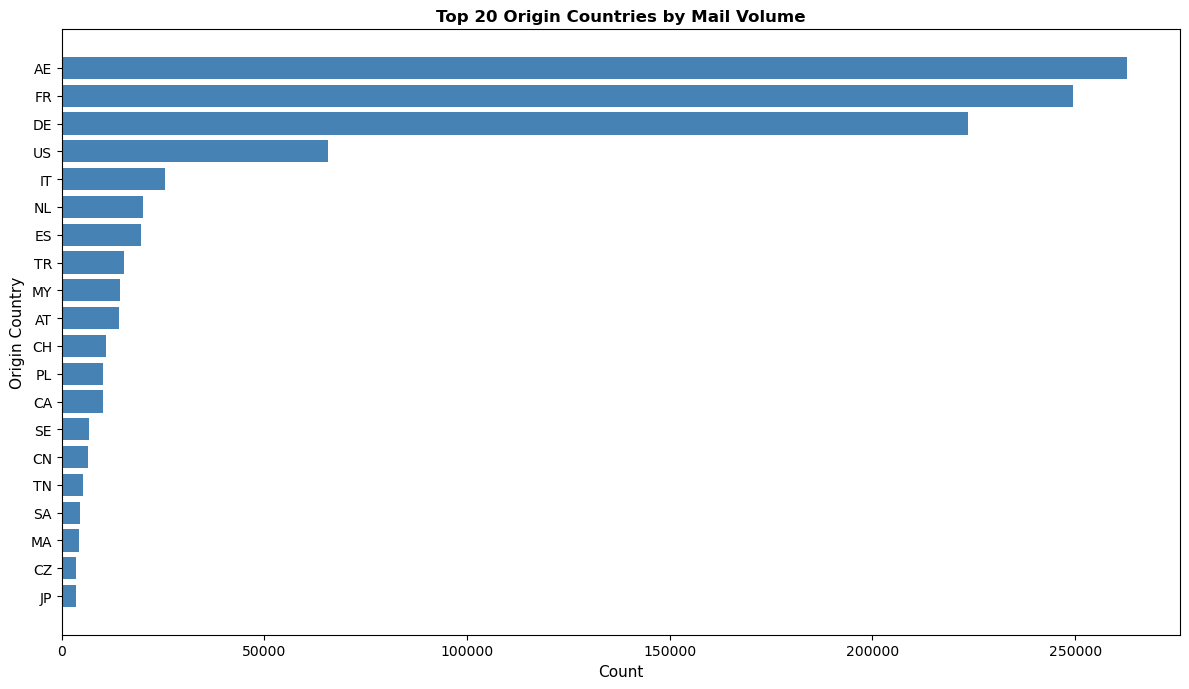

In [ ]:
origin_country_counts = parsed_packages_df['origin_country'].value_counts().head(20)
plt.figure(figsize=(12, 7))
plt.barh(origin_country_counts.index, origin_country_counts.values, color='steelblue')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Origin Country', fontsize=11)
plt.title('Top 20 Origin Countries by packages Volume', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## visualization of Arrival Hub distribution according to number of packages

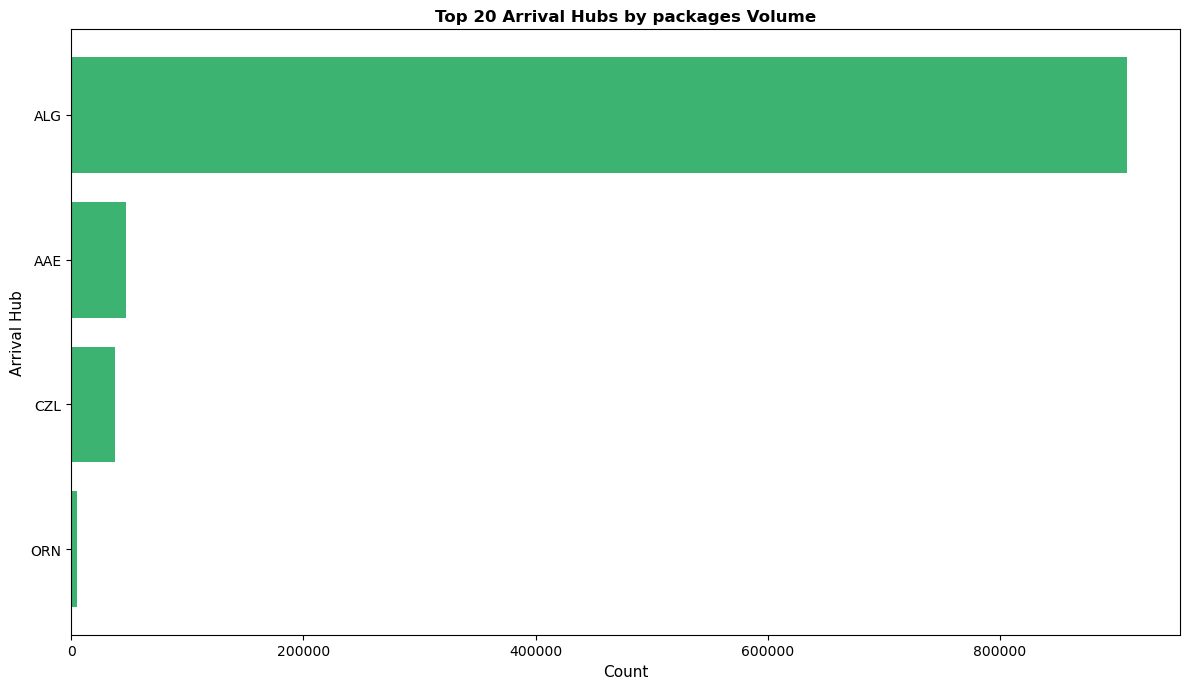

In [75]:

arrival_hub_counts = parsed_packages_df['arrival_hub'].value_counts().head(20)
plt.figure(figsize=(12, 7))
plt.barh(arrival_hub_counts.index, arrival_hub_counts.values, color='mediumseagreen')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Arrival Hub', fontsize=11)
plt.title('Top 20 Arrival Hubs by packages Volume', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Visualiation of the service indicator

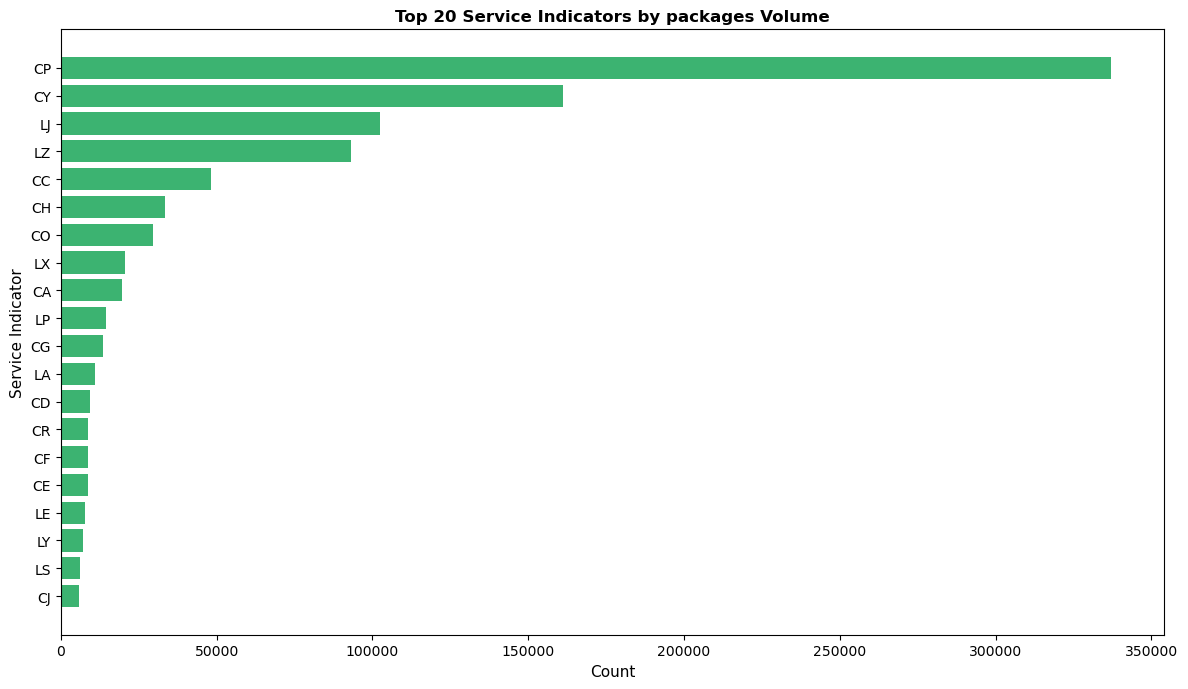

In [72]:
service_indicator_count = parsed_packages_df['service_indicator'].value_counts().head(20)
plt.figure(figsize=(12, 7))
plt.barh(service_indicator_count.index, service_indicator_count.values, color='mediumseagreen')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Service Indicator', fontsize=11)
plt.title('Top 20 Service Indicators by packages Volume', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Origin–Destination Flow Analysis

This section investigates the flow of receptacles from origin countries through arrival hubs. We examine:
- packages volume by origin country
- Top origin countries delivering to each destination
- Visual representation 

In [78]:
# Parcel volume by origin country
origin_country_volume = parsed_packages_df['origin_country'].value_counts()
print("\n--- Parcel Volume by Origin Country ---")
print(origin_country_volume.head(15))

# Create origin_country × arrival_hub matrix
flow_matrix = pd.crosstab(parsed_packages_df['origin_country'], 
                           parsed_packages_df['arrival_hub'])

# Keep only top 10 origin countries and top 10 arrival hubs for readability
top_origins = parsed_packages_df['origin_country'].value_counts().head(10).index
top_arrivals = parsed_packages_df['arrival_hub'].value_counts().head(10).index

flow_matrix_top = flow_matrix.loc[top_origins, top_arrivals]

print("\n--- Origin Country × Arrival Hub Matrix (Top 10 × Top 10) ---")
print(flow_matrix_top)



--- Parcel Volume by Origin Country ---
origin_country
AE    262736
FR    249528
DE    223559
US     65565
IT     25549
NL     20033
ES     19623
TR     15353
MY     14461
AT     14115
CH     10968
PL     10245
CA     10196
SE      6815
CN      6459
Name: count, dtype: int64

--- Origin Country × Arrival Hub Matrix (Top 10 × Top 10) ---
arrival_hub        ALG    AAE    CZL   ORN
origin_country                            
AE              172460  47255  37785  5236
FR              249528      0      0     0
DE              223559      0      0     0
US               65565      0      0     0
IT               25549      0      0     0
NL               20033      0      0     0
ES               19623      0      0     0
TR               15353      0      0     0
MY               14430      0     31     0
AT               14115      0      0     0


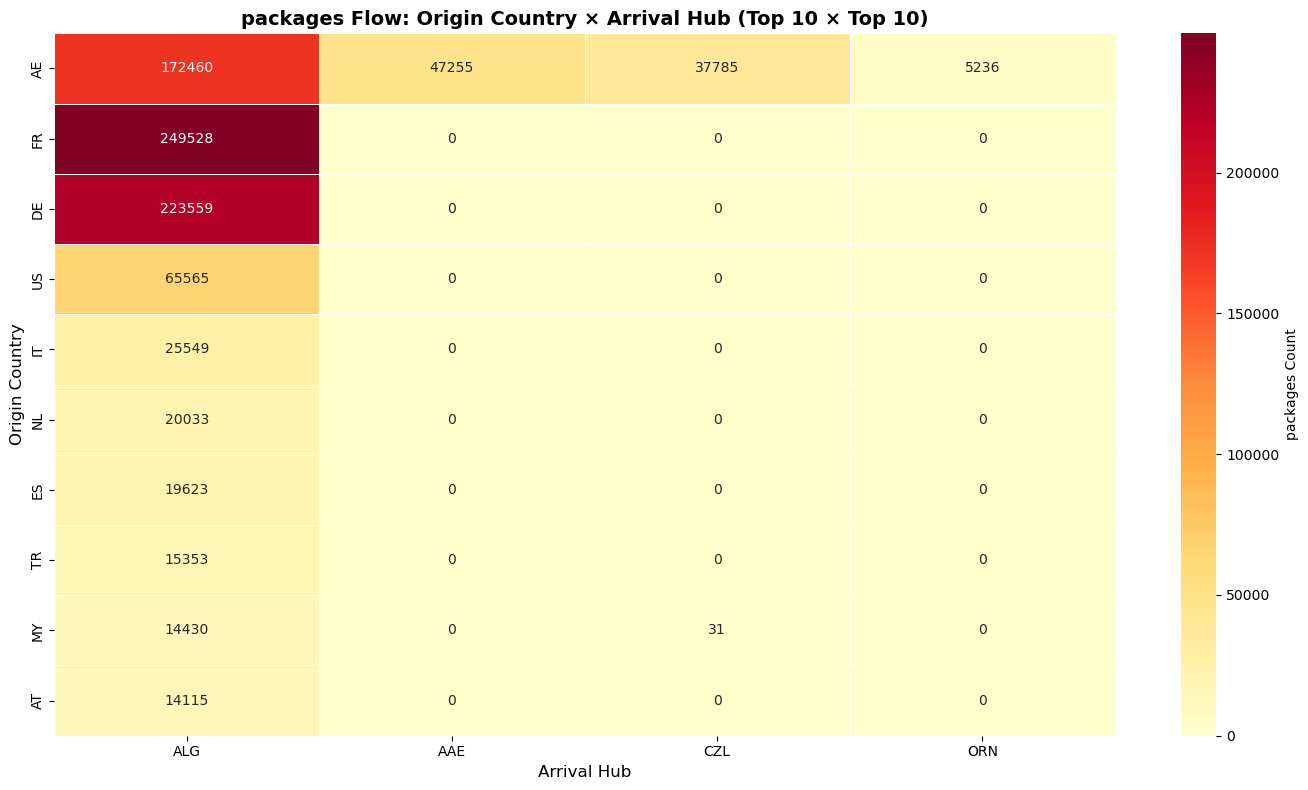

In [92]:
# Visualize origin × arrival hub flow
plt.figure(figsize=(14, 8))
sns.heatmap(flow_matrix_top, cmap='YlOrRd', annot=True, fmt='d', 
            cbar_kws={'label': 'packages Count'}, linewidths=0.5)
plt.title('packages Flow: Origin Country × Arrival Hub (Top 10 × Top 10)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Arrival Hub', fontsize=12)
plt.ylabel('Origin Country', fontsize=12)
plt.tight_layout()
plt.show()


# Export Bag Analysis

This section examines the **export_bag** feature, which indicates the type of physical mail container:
- Distribution of bag types
- How bag types vary by origin geography
- Relationship between bag types and treatment classes

In [97]:

# Distribution of export_bag
export_bag_dist = parsed_packages_df['export_bag'].value_counts()
print("\n--- Export Bag Distribution ---")
print(export_bag_dist)
print(f"\nTotal unique export_bag types: {len(export_bag_dist)}")

# Export bag by origin_country
export_by_country = pd.crosstab(parsed_packages_df['origin_country'], 
                                 parsed_packages_df['export_bag'])
print("\n--- Export Bag by Origin Country (Top 10 countries) ---")
top_countries = parsed_packages_df['origin_country'].value_counts().head(10).index
print(export_by_country.loc[top_countries])



--- Export Bag Distribution ---
export_bag
A    892547
B     77302
C     17046
H      4399
U      2003
Z      1910
D      1740
P      1304
S       639
V       621
K       314
X        65
E        58
G        52
Name: count, dtype: int64

Total unique export_bag types: 14

--- Export Bag by Origin Country (Top 10 countries) ---
export_bag           A      B   C  D   E  G  H  K  P    S  U  V   X     Z
origin_country                                                           
AE              262736      0   0  0   0  0  0  0  0    0  0  0   0     0
FR              249528      0   0  0   0  0  0  0  0    0  0  0   0     0
DE              223549     10   0  0   0  0  0  0  0    0  0  0   0     0
US               62951      0   0  0   0  0  0  0  0  639  0  0  65  1910
IT               25549      0   0  0   0  0  0  0  0    0  0  0   0     0
NL               19794    239   0  0   0  0  0  0  0    0  0  0   0     0
ES                   0  19623   0  0   0  0  0  0  0    0  0  0   0     0
TR  

### Visualization 1: Export bag distribution (histogram/bar chart)

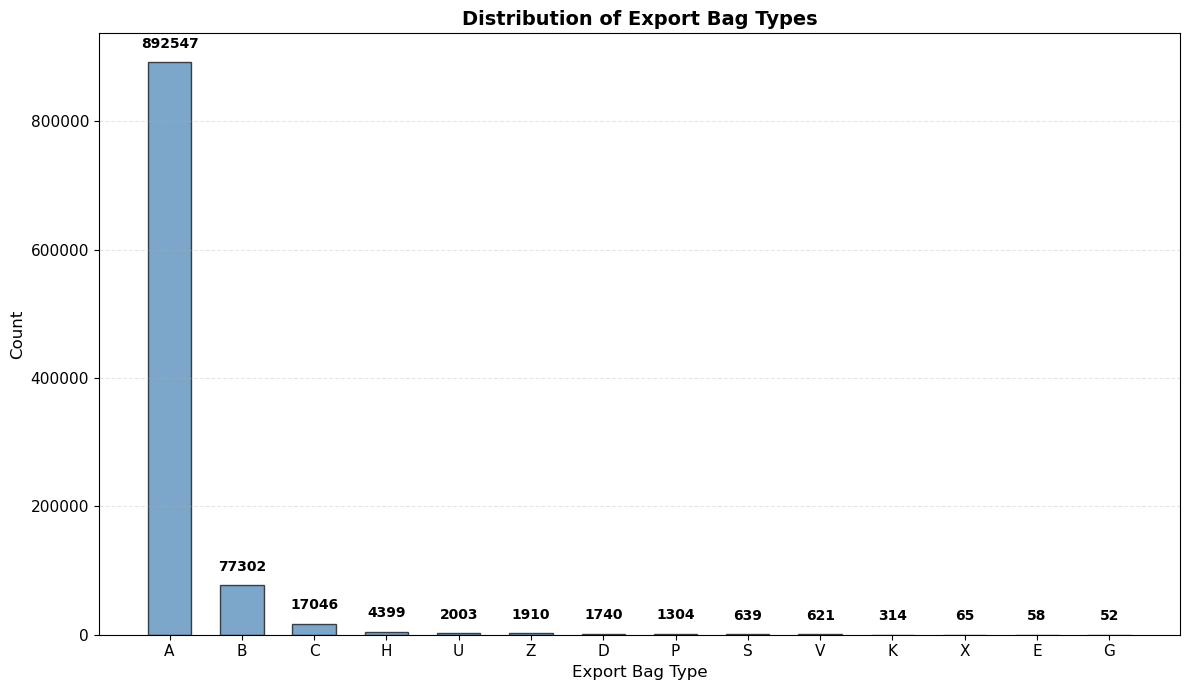

In [86]:
plt.figure(figsize=(12, 7))
plt.bar(export_bag_dist.index, export_bag_dist.values, color='steelblue', edgecolor='black', alpha=0.7, width=0.6)
plt.title('Distribution of Export Bag Types', fontsize=14, fontweight='bold')
plt.xlabel('Export Bag Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
# Add value labels on top of bars
for i, v in enumerate(export_bag_dist.values):
    plt.text(i, v + max(export_bag_dist.values)*0.02, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


### Visualization 2: Export bag by top origin countries (heatmap)

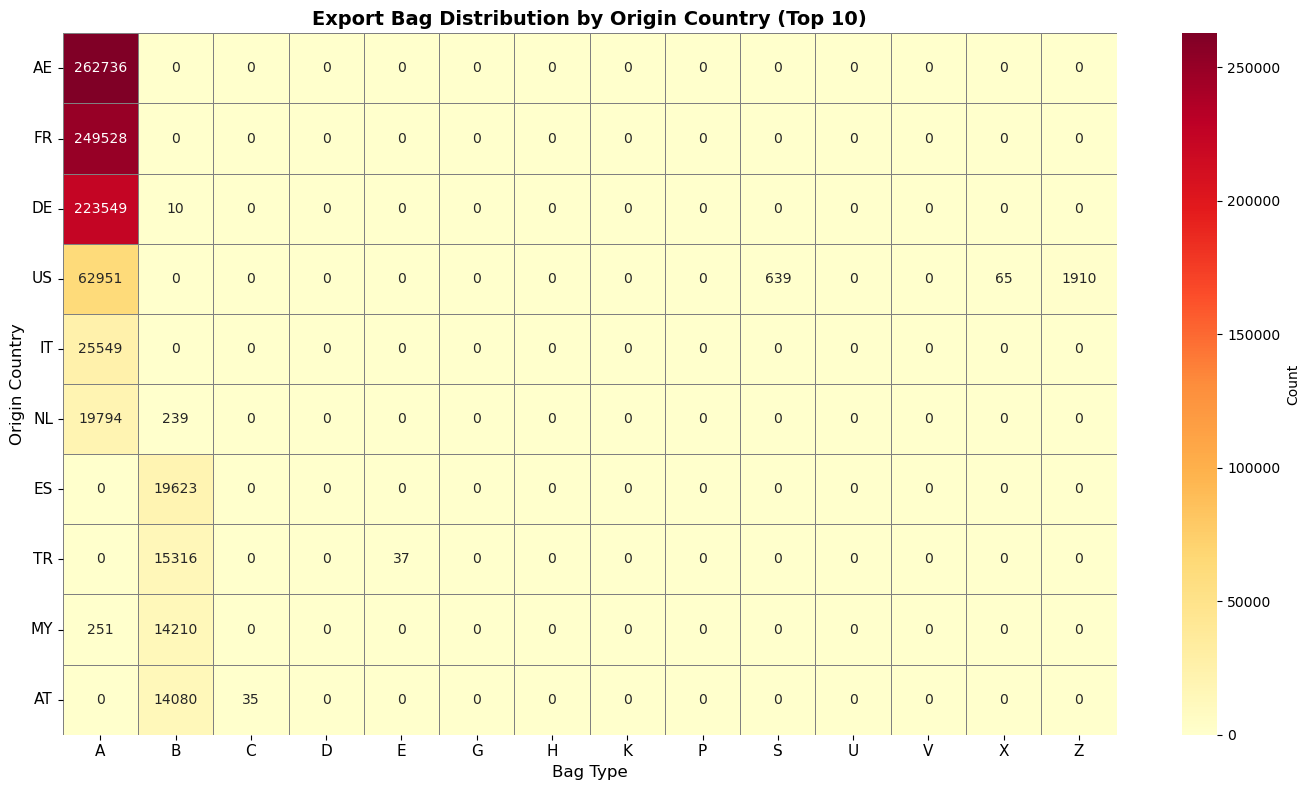

In [95]:
plt.figure(figsize=(14, 8))
export_by_country_top = export_by_country.loc[top_countries]

# Create heatmap with annotations
sns.heatmap(export_by_country_top, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Count'}, linewidths=0.5, linecolor='gray')

plt.title('Export Bag Distribution by Origin Country (Top 10)', fontsize=14, fontweight='bold')
plt.xlabel('Bag Type', fontsize=12)
plt.ylabel('Origin Country', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

### Visualization 3: Export bag × treatment class heatmap

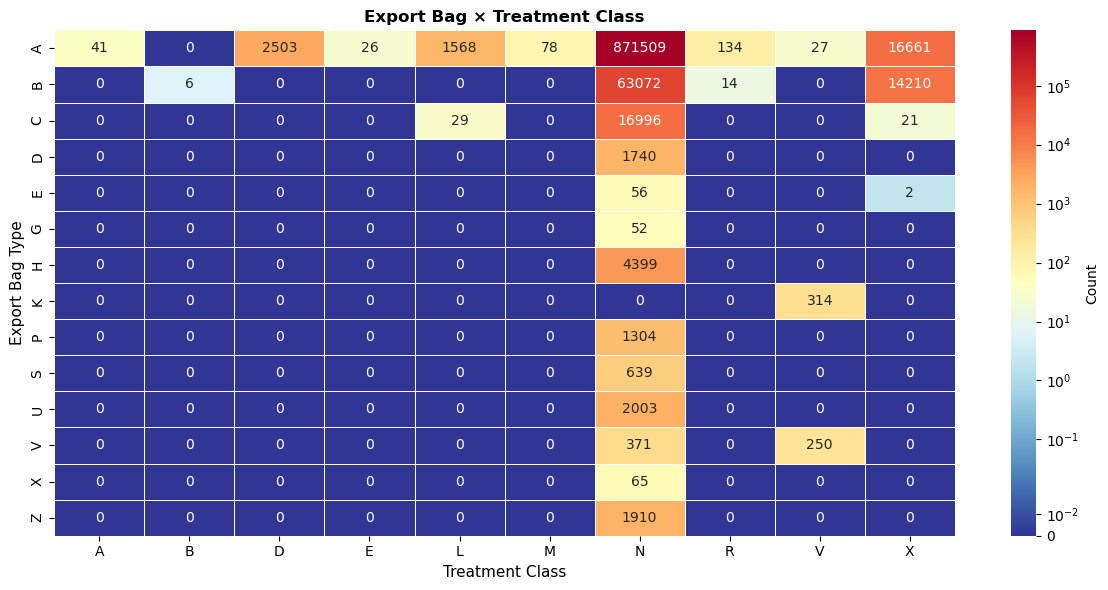

In [124]:


plt.figure(figsize=(12, 6))
bag_treatment = pd.crosstab(parsed_packages_df['export_bag'], 
                             parsed_packages_df['treatment_class'])

norm = mcolors.SymLogNorm(linthresh=0.03, vmin=bag_treatment.min().min(), 
                          vmax=bag_treatment.max().max())

sns.heatmap(bag_treatment, annot=True, fmt='d', cmap='RdYlBu_r',
            cbar_kws={'label': 'Count'}, linewidths=0.5, norm=norm)

plt.title('Export Bag × Treatment Class', fontsize=12, fontweight='bold')
plt.xlabel('Treatment Class', fontsize=11)
plt.ylabel('Export Bag Type', fontsize=11)
plt.tight_layout()
plt.show()



# Treatment class Analysis

This section analyzes the **treatment_class** feature, which indicates how packages should be processed:
- Distribution of treatment classes
- Treatment class patterns by origin country, export bag, and arrival hub
- Visualiztion

In [98]:

# Distribution of treatment_class
treatment_dist = parsed_packages_df['treatment_class'].value_counts()
print("\n--- Treatment Class Distribution ---")
print(treatment_dist)
print(f"\nTotal unique treatment classes: {len(treatment_dist)}")

# Treatment class by origin_country
treatment_by_country = pd.crosstab(parsed_packages_df['origin_country'], 
                                    parsed_packages_df['treatment_class'])
print("\n--- Treatment Class by Origin Country (Top 10 countries) ---")
print(treatment_by_country.loc[top_countries])



--- Treatment Class Distribution ---
treatment_class
N    964116
X     30894
D      2503
L      1597
V       591
R       148
M        78
A        41
E        26
B         6
Name: count, dtype: int64

Total unique treatment classes: 10

--- Treatment Class by Origin Country (Top 10 countries) ---
treatment_class   A  B     D  E     L   M       N   R  V      X
origin_country                                                 
AE               23  0     0  0     0   0  262713   0  0      0
FR                0  0  2503  0  1568   0  245457   0  0      0
DE                0  0     0  0     0   0  206909  64  0  16586
US               12  0     0  0     0  57   65496   0  0      0
IT                0  0     0  0     0   0   25549   0  0      0
NL                0  0     0  0     0   0   19983  50  0      0
ES                0  0     0  0     0   0   19623   0  0      0
TR                0  6     0  0     0   0   15347   0  0      0
MY                6  0     0  0     0   0     245   0  0  1421

In [99]:
# Treatment class by export_bag
treatment_by_bag = pd.crosstab(parsed_packages_df['export_bag'], 
                                parsed_packages_df['treatment_class'])
print("\n--- Treatment Class by Export Bag ---")
print(treatment_by_bag)

# Treatment class by arrival_hub
treatment_by_arrival = pd.crosstab(parsed_packages_df['arrival_hub'], 
                                    parsed_packages_df['treatment_class'])
print("\n--- Treatment Class by Arrival Hub (Top 10 hubs) ---")
top_arrivals_list = parsed_packages_df['arrival_hub'].value_counts().head(10).index
print(treatment_by_arrival.loc[top_arrivals_list])



--- Treatment Class by Export Bag ---
treatment_class   A  B     D   E     L   M       N    R    V      X
export_bag                                                         
A                41  0  2503  26  1568  78  871509  134   27  16661
B                 0  6     0   0     0   0   63072   14    0  14210
C                 0  0     0   0    29   0   16996    0    0     21
D                 0  0     0   0     0   0    1740    0    0      0
E                 0  0     0   0     0   0      56    0    0      2
G                 0  0     0   0     0   0      52    0    0      0
H                 0  0     0   0     0   0    4399    0    0      0
K                 0  0     0   0     0   0       0    0  314      0
P                 0  0     0   0     0   0    1304    0    0      0
S                 0  0     0   0     0   0     639    0    0      0
U                 0  0     0   0     0   0    2003    0    0      0
V                 0  0     0   0     0   0     371    0  250      0
X        

###  Overall treatment class distribution 

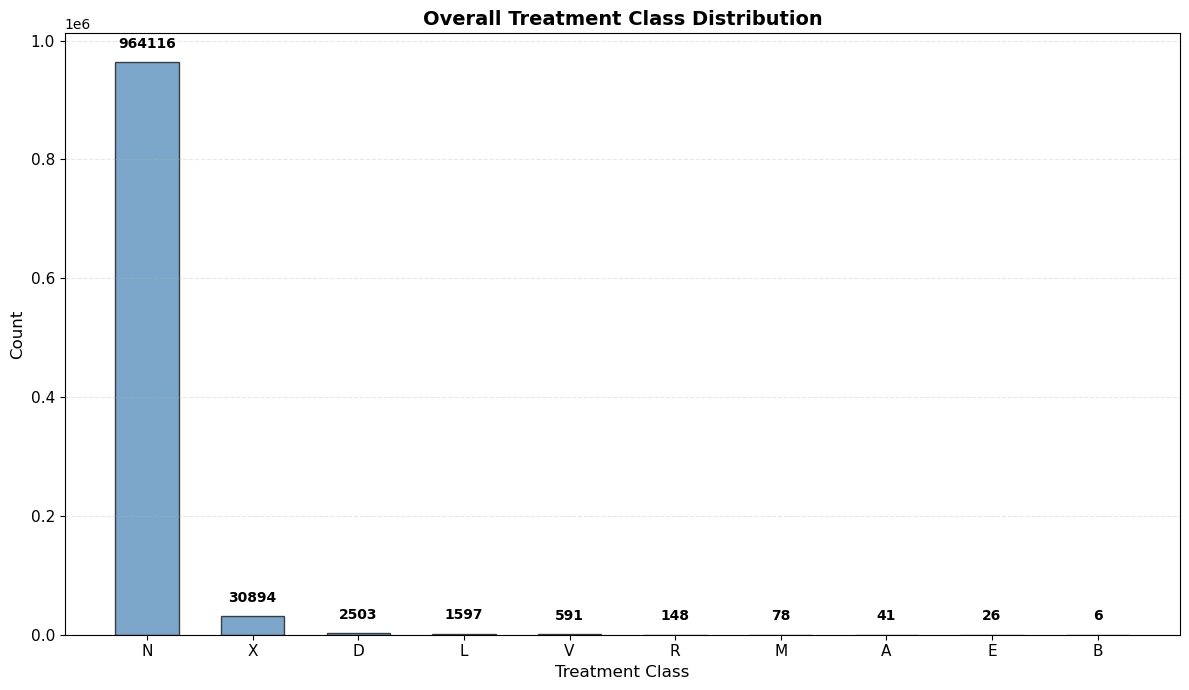

In [109]:
plt.figure(figsize=(12, 7))
plt.bar(treatment_dist.index, treatment_dist.values, color='steelblue', edgecolor='black', alpha=0.7, width=0.6)
plt.title('Overall Treatment Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Treatment Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add value labels on top of bars with counts only
for i, v in enumerate(treatment_dist.values):
    plt.text(i, v + max(treatment_dist.values)*0.02, f'{v}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


### Treatment class by top origin countries (heatmap)

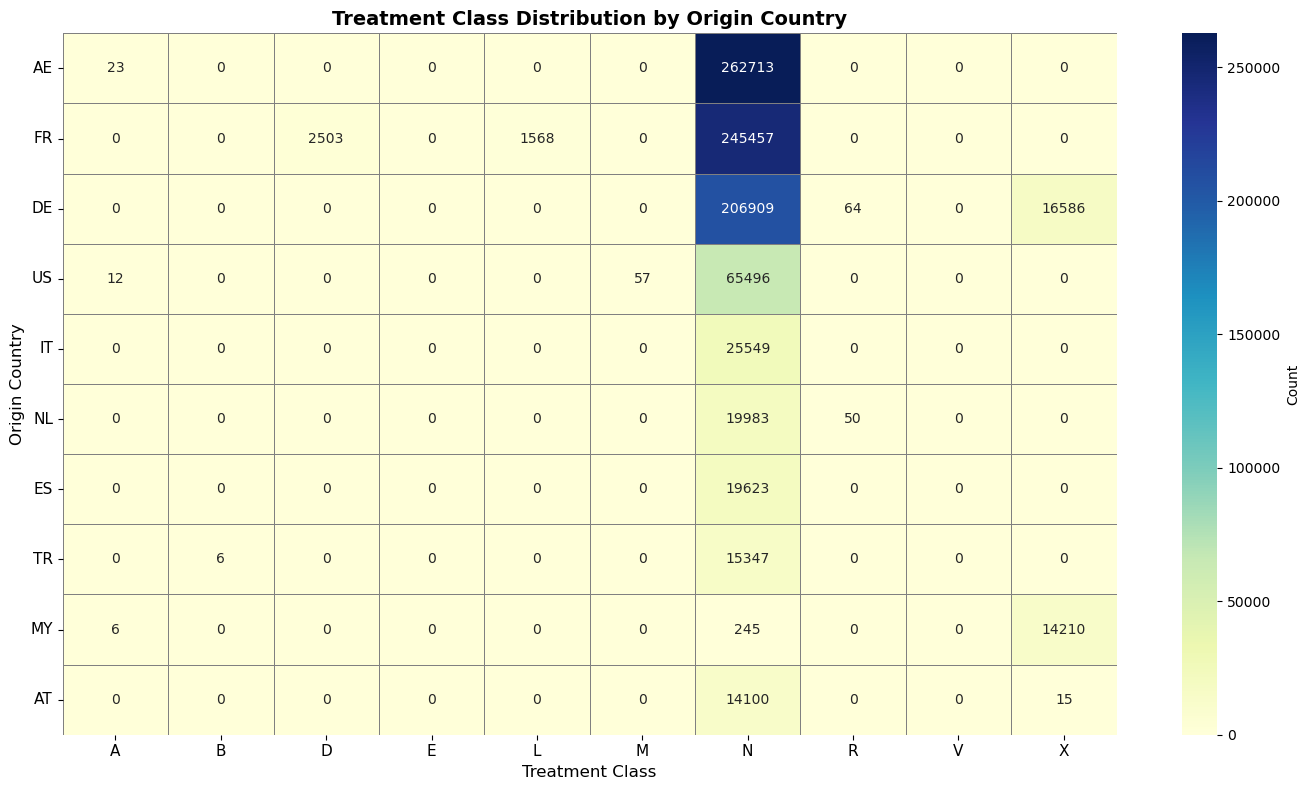

In [113]:

plt.figure(figsize=(14, 8))
treatment_by_country_top = treatment_by_country.loc[top_countries]

# Create heatmap
sns.heatmap(treatment_by_country_top, annot=True, fmt='d', cmap='YlGnBu',
            cbar_kws={'label': 'Count'}, linewidths=0.5, linecolor='gray')

plt.title('Treatment Class Distribution by Origin Country', fontsize=14, fontweight='bold')
plt.xlabel('Treatment Class', fontsize=12)
plt.ylabel('Origin Country', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

### Treatment class by arrival hub (heatmap)

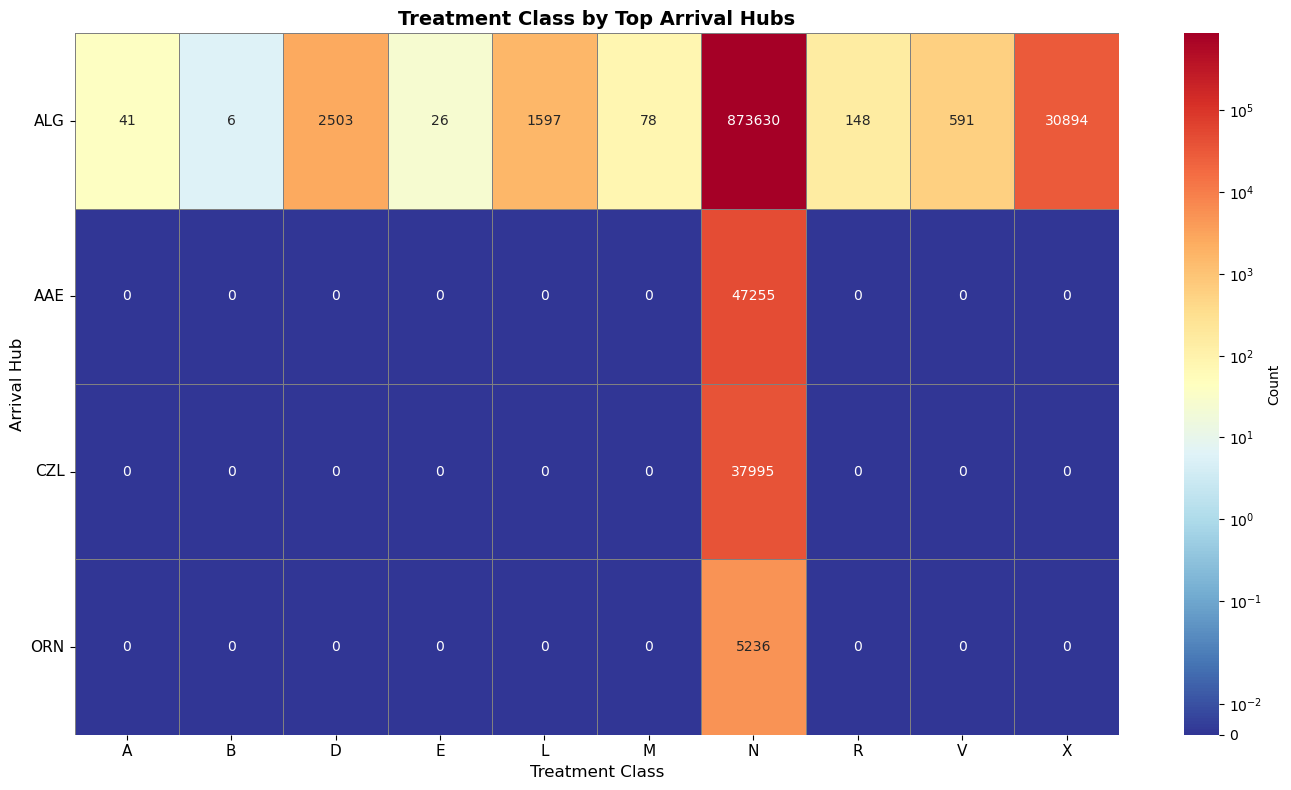

In [ ]:
plt.figure(figsize=(14, 8))
treatment_by_arrival_top = treatment_by_arrival.loc[top_arrivals_list]
norm = mcolors.SymLogNorm(linthresh=0.03, vmin=treatment_by_arrival_top.min().min(), 
                          vmax=treatment_by_arrival_top.max().max())

sns.heatmap(treatment_by_arrival_top, annot=True, fmt='d', cmap='RdYlBu_r',
            cbar_kws={'label': 'Count'}, linewidths=0.5, linecolor='gray', norm=norm)

plt.title('Treatment Class by Top Arrival Hubs', fontsize=14, fontweight='bold')
plt.xlabel('Treatment Class', fontsize=12)
plt.ylabel('Arrival Hub', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()